In [24]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np


df_strict = pd.read_excel('Strict_search_0.xlsx')
df_strict2 = pd.read_excel('Strict_search_short_4.xlsx')
df_strict = pd.concat([df_strict, df_strict2])
df_strict['avgRewards'] = df_strict['avgRewards'].apply(lambda x: ast.literal_eval(x))
df_strict2.tail() # shows top 5 rows

,Unnamed: 0,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
122,123,1,32,0.80,0.8,0.10,1000,0.0001,1000,True,50,"[0.09090909090909091, 0.1, 0.3, 0.0, 0.1, 0.4,...",0.86,0.93,4680,NaN
123,124,1,128,0.80,0.8,0.00,3000,0.0010,1000,True,50,"[0.0, 0.4, 0.4, 0.2, 0.4, 0.1, 0.2, 0.4, 0.3, ...",0.58,0.76,4180,NaN
124,125,1,256,0.99,1.0,0.05,1000,0.0001,5000,True,10,"[0.2727272727272727, 0.1, 0.4, 0.3, 0.2, 0.2, ...",0.92,0.97,4400,NaN
125,126,1,128,0.99,0.8,0.10,1000,0.0001,5000,True,10,"[0.0, 0.2, 0.0, 0.2, 0.1, 0.2, 0.3, 0.1, 0.3, ...",0.91,0.98,4020,NaN
126,127,1,256,0.90,1.0,0.00,2000,0.0010,5000,True,10,"[0.36363636363636365, 0.3, 0.2, 0.4, 0.3, 0.5,...",0.90,0.95,4460,NaN


In [25]:
len(df_strict2)

127

In [40]:
import os

#RESULTS_DATAFRAME = pd.read_excel('Strict_search_0.xlsx')

output_filename = 'Strict_search_2.xlsx'

try:
    RESULTS_DATAFRAME = pd.read_excel(output_filename)
    RESULTS_DATAFRAME.loc[len(RESULTS_DATAFRAME)+1] = RESULTS_DATAFRAME.loc[10]
except:
    RESULTS_DATAFRAME.loc[0] = RESULTS_DATAFRAME.loc[10]
    output_filename = 'grid_backup.xlsx'

print(len(RESULTS_DATAFRAME))

RESULTS_DATAFRAME.to_excel(output_filename) # saves on every iteration (in case this takes long, or crashes, we can still pull the results out)

False
256


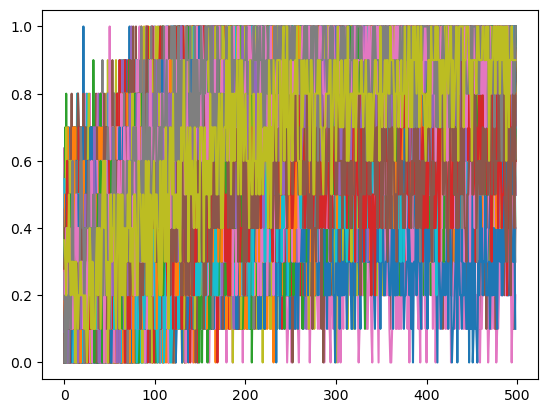

In [68]:
for i, row in df_strict.iterrows():
    plt.plot(row['avgRewards'])

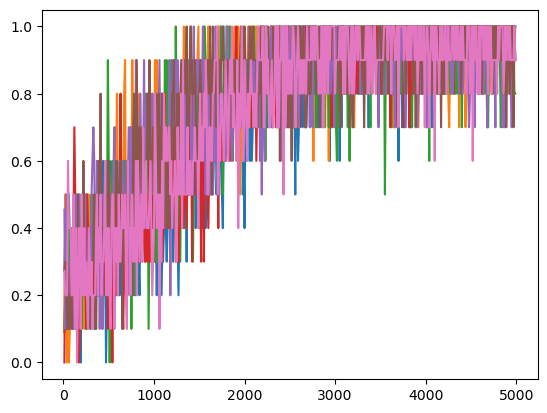

,Unnamed: 0,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
27,28,1,32,0.90,1.0,0.00,1000,0.0001,1000,True,10,"[0.2727272727272727, 0.4, 0.2, 0.3, 0.2, 0.5, ...",0.97,0.99,3190,NaN
20,21,1,128,0.90,0.8,0.00,1000,0.0010,5000,True,50,"[0.09090909090909091, 0.5, 0.3, 0.0, 0.2, 0.0,...",0.90,0.98,3560,NaN
28,29,1,32,0.90,0.8,0.05,1000,0.0001,1000,True,50,"[0.09090909090909091, 0.2, 0.1, 0.5, 0.3, 0.5,...",0.90,0.98,2740,NaN
58,59,1,32,0.80,1.0,0.00,1000,0.0001,5000,True,10,"[0.0, 0.4, 0.4, 0.1, 0.2, 0.1, 0.2, 0.3, 0.3, ...",0.95,0.98,3490,NaN
87,88,1,128,0.90,0.8,0.05,1000,0.0001,5000,False,10,"[0.45454545454545453, 0.1, 0.5, 0.4, 0.2, 0.1,...",0.89,0.97,3090,NaN
4,5,1,128,0.99,0.8,0.00,1000,0.0001,5000,True,10,"[0.2727272727272727, 0.3, 0.2, 0.1, 0.3, 0.1, ...",0.91,0.97,2620,NaN
26,27,1,32,0.90,1.0,0.05,1000,0.0001,5000,False,50,"[0.2727272727272727, 0.2, 0.2, 0.2, 0.6, 0.4, ...",0.94,0.97,3630,NaN


In [63]:
best = df_strict.nlargest(30, ['best_average_100_episodes'])
best_short = best[best['time_of_peak'] < 4000]


X = np.arange(10, 5000, 10)

for i, row in best_short.iterrows():
    plt.plot(X, row['avgRewards'])
plt.show()

best_short.head(20)

## FIRST SET

In [12]:
import os

df_ALL = pd.read_excel('Grid_search_0.xlsx')

folder = 'Grid_Results'
for excel in os.listdir(folder):
    df_temp = pd.read_excel(os.path.join(folder, excel))
    df_ALL = pd.concat([df_ALL, df_temp])

df_ALL['avgRewards'] = df_ALL['avgRewards'].apply(lambda x: ast.literal_eval(x))

df_ALL.head()

,Unnamed: 0,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
0,1,0,32,0.8,0.8,0.00,1000,0.0010,1000,True,10,"[0.45454545454545453, 0.2, 0.1, 0.4, 0.2, 0.3,...",0.26,0.38,1920,NaN
1,2,0,32,0.8,0.8,0.00,1000,0.0010,1000,True,50,"[0.36363636363636365, 0.4, 0.3, 0.3, 0.3, 0.6,...",0.22,0.39,840,NaN
0,1,0,32,0.8,0.8,0.00,1000,0.0010,1000,True,10,"[0.45454545454545453, 0.2, 0.1, 0.4, 0.2, 0.3,...",0.26,0.38,1920,NaN
1,2,0,32,0.8,0.8,0.00,1000,0.0010,1000,True,50,"[0.36363636363636365, 0.4, 0.3, 0.3, 0.3, 0.6,...",0.22,0.39,840,NaN
0,1,1,256,0.8,0.8,0.05,1000,0.0001,1000,False,50,"[0.09090909090909091, 0.4, 0.1, 0.1, 0.1, 0.4,...",0.82,0.89,3370,NaN


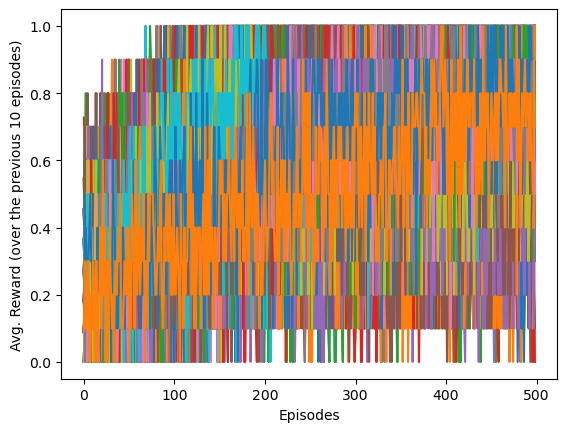

In [13]:
# plot all the reward curves (to see if there is any hope for a really nice one)
for i, row in df_ALL.iterrows():
    plt.plot(row['avgRewards'])

plt.xlabel("Episodes")
plt.ylabel("Avg. Reward (over the previous 10 episodes)")
plt.show()

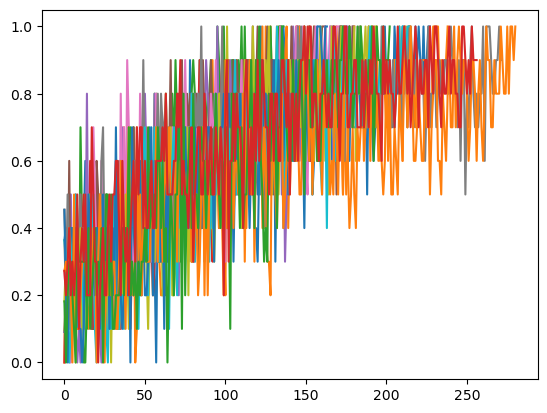

,Unnamed: 0,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
41,42,1,256,0.99,0.8,0.05,1000,0.0001,5000,False,10,"[0.36363636363636365, 0.4, 0.1, 0.3, 0.3, 0.2,...",0.93,0.93,2280,2280.0
6,7,1,32,0.90,1.0,0.05,1000,0.0010,5000,False,50,"[0.0, 0.3, 0.2, 0.1, 0.1, 0.2, 0.2, 0.1, 0.3, ...",0.93,0.93,2390,2390.0
50,51,1,32,0.90,0.8,0.00,1000,0.0010,5000,False,50,"[0.09090909090909091, 0.2, 0.3, 0.2, 0.2, 0.1,...",0.92,0.92,1370,1370.0
84,85,1,32,0.99,0.8,0.10,1000,0.0001,5000,True,10,"[0.0, 0.4, 0.2, 0.2, 0.1, 0.3, 0.2, 0.5, 0.4, ...",0.92,0.92,1810,1810.0
52,53,1,128,0.90,1.0,0.10,1000,0.0010,5000,False,10,"[0.09090909090909091, 0.1, 0.1, 0.5, 0.5, 0.1,...",0.92,0.92,1810,1810.0
67,68,1,32,0.99,0.8,0.00,1000,0.0010,5000,False,50,"[0.45454545454545453, 0.3, 0.1, 0.6, 0.1, 0.3,...",0.92,0.92,1800,1800.0
87,88,1,256,0.80,0.8,0.05,1000,0.0010,5000,False,10,"[0.2727272727272727, 0.2, 0.2, 0.0, 0.0, 0.2, ...",0.92,0.92,1710,1710.0
90,91,1,128,0.80,0.8,0.05,1000,0.0010,5000,True,10,"[0.36363636363636365, 0.2, 0.5, 0.3, 0.4, 0.1,...",0.92,0.92,2720,2720.0
52,53,1,128,0.99,0.8,0.10,1000,0.0001,5000,True,50,"[0.18181818181818182, 0.3, 0.2, 0.3, 0.1, 0.3,...",0.92,0.92,1940,1940.0
26,27,1,32,0.99,1.0,0.00,1000,0.0001,5000,True,50,"[0.36363636363636365, 0.3, 0.2, 0.0, 0.1, 0.4,...",0.92,0.92,2150,2150.0


In [62]:
# see the runs that achieved the highest average reward over 100 episodes

best = df_ALL.nlargest(50, ['best_average_100_episodes'])
best_short = best[best['time_of_peak'] < 3000]

X = np.arange(10, 5000, 10)

for i, row in best_short.iterrows():
    plt.plot(row['avgRewards'])
plt.show()


best_short.head(20)

In [15]:
# see the runs that converged


grid_search_df[~grid_search_df['time_to_convergence'].isna()].head()



,Unnamed: 0,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
